In [116]:
import pandas as pd
import numpy as np
import censusdata as cd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%config InlineBackend.figure_format = 'svg'
%matplotlib inline 
sns.set(color_codes=True, style='whitegrid')

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)

In [117]:
age_dis_df = pd.read_csv('age_disability_acs_2018_5y.csv')

In [121]:
pure_zip_codes = [x[-5:] for x in age_dis_df['Zip Code'].values]

In [122]:
age_dis_df['Zip Code'] = pure_zip_codes

In [123]:
age_dis_df.head()

,id,Zip Code,Estimate!! With a cognitive difficulty,Margin of Error ! With a cognitive difficulty,Estimate!! Percent with a cognitive difficulty,Margin of Error!!Percent with a cognitive difficulty,Estimate!! With a vision difficulty,Margin of Error!!With a vision difficulty,Estimate!!Percent with a vision difficulty,Margin of Error!!Percent with a vision difficulty,Estimate!! With an independent living difficulty,Margin of Error!! With an independent living difficulty,Estimate!!Percent with an independent living difficulty,Margin of Error!!Percent with an independent living difficulty,Estimate!! With a self-care difficulty,Margin of Error!! With a self-care difficulty,Estimate!! With a self-care difficulty.1,Margin of Error!!Percent with a self-care difficulty,Estimate!! With an ambulatory difficulty,Margin of Error!! With an ambulatory difficulty,Estimate!!Percent with an ambulatory difficulty,Margin of Error!!Percent with an ambulatory difficulty,Estimate!!Total population,Margin of Error!!Total population,Estimate!! Total population Under 5 years,Margin of Error!! Total population Under 5 years,Estimate!! Percent!! Total population Under 5 years,Margin of Error!!Percent !!Total population Under 5 years,Estimate!!Total population 60 years and over,Margin of Error!! Total population 60 years and over,Estimate!!Percent!!Total population 60 years and over,Margin of Error!!Percent!!Total population 60 years and over
0,8600000US10001,10001,745,235,3.3,1,436,157,1.9,0.7,570,184,2.7,0.9,521,179,2.3,0.8,1203,263,5.4,1.2,22924,1190,472,163,2.1,0.7,4825,503,21,2.2
1,8600000US10002,10002,4579,713,6.3,0.9,3050,418,4.1,0.6,5634,724,8.7,1.1,3473,491,4.8,0.7,7524,760,10.4,1,74993,1909,2637,475,3.5,0.6,21188,1102,28.3,1.5
2,8600000US10003,10003,1426,390,2.7,0.7,953,269,1.7,0.5,1177,401,2.3,0.8,439,184,0.8,0.4,1629,344,3.1,0.7,54682,1754,1767,367,3.2,0.6,9253,826,16.9,1.4
3,8600000US10004,10004,46,40,1.6,1.4,59,46,1.9,1.5,29,46,1.1,1.7,0,12,0,1.1,35,39,1.2,1.3,3028,442,125,61,4.1,2.1,415,189,13.7,6.2
4,8600000US10005,10005,100,78,1.2,0.9,6,10,0.1,0.1,3,5,0,0.1,1,4,0,0.1,44,36,0.5,0.4,8831,762,522,237,5.9,2.6,147,107,1.7,1.2


In [124]:
age_dis_df.columns

Index(['id', 'Zip Code', 'Estimate!!  With a cognitive difficulty',
       'Margin of Error ! With a cognitive difficulty',
       'Estimate!! Percent with a cognitive difficulty',
       'Margin of Error!!Percent with a cognitive difficulty',
       'Estimate!! With a vision difficulty',
       'Margin of Error!!With a vision difficulty',
       'Estimate!!Percent with a vision difficulty',
       'Margin of Error!!Percent with a vision difficulty',
       'Estimate!! With an independent living difficulty',
       'Margin of Error!! With an independent living difficulty',
       'Estimate!!Percent with an independent living difficulty',
       'Margin of Error!!Percent with an independent living difficulty',
       'Estimate!! With a self-care difficulty',
       'Margin of Error!! With a self-care difficulty',
       'Estimate!! With a self-care difficulty.1',
       'Margin of Error!!Percent with a self-care difficulty',
       'Estimate!! With an ambulatory difficulty',
       'Mar

In [125]:
relevant_columns = [x for x in age_dis_df.columns if 'Margin of Error' not in x]

In [126]:
relevant_columns

['id',
 'Zip Code',
 'Estimate!!  With a cognitive difficulty',
 'Estimate!! Percent with a cognitive difficulty',
 'Estimate!! With a vision difficulty',
 'Estimate!!Percent with a vision difficulty',
 'Estimate!! With an independent living difficulty',
 'Estimate!!Percent with an independent living difficulty',
 'Estimate!! With a self-care difficulty',
 'Estimate!! With a self-care difficulty.1',
 'Estimate!! With an ambulatory difficulty',
 'Estimate!!Percent with an ambulatory difficulty',
 'Estimate!!Total population',
 'Estimate!! Total population Under 5 years',
 'Estimate!! Percent!! Total population Under 5 years',
 'Estimate!!Total population 60 years and over',
 'Estimate!!Percent!!Total population 60 years and over']

In [127]:
relevant_columns.remove('id')

In [128]:
relevant_columns

['Zip Code',
 'Estimate!!  With a cognitive difficulty',
 'Estimate!! Percent with a cognitive difficulty',
 'Estimate!! With a vision difficulty',
 'Estimate!!Percent with a vision difficulty',
 'Estimate!! With an independent living difficulty',
 'Estimate!!Percent with an independent living difficulty',
 'Estimate!! With a self-care difficulty',
 'Estimate!! With a self-care difficulty.1',
 'Estimate!! With an ambulatory difficulty',
 'Estimate!!Percent with an ambulatory difficulty',
 'Estimate!!Total population',
 'Estimate!! Total population Under 5 years',
 'Estimate!! Percent!! Total population Under 5 years',
 'Estimate!!Total population 60 years and over',
 'Estimate!!Percent!!Total population 60 years and over']

In [129]:
manhattan_zip_codes = [
   10026, 10027, 10030, 10037, 10039, 
   10001, 10011, 10018, 10019, 10020, 
   10036, 10029, 10035, 10010, 10016, 
   10017, 10022, 10012, 10013, 10014, 
   10004, 10005, 10006, 10007, 10038, 
   10280, 10002, 10003, 10009, 10021, 
   10028, 10044, 10065, 10075, 10128, 
   10023, 10024, 10025, 10031, 10032, 
   10033, 10034, 10040
]

manhattan_zip_codes = [str(x) for x in manhattan_zip_codes]

In [130]:
# Filter for 43 Manhattan zip codes as provided in this URL (see below)
# https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm
age_dis_df = age_dis_df[age_dis_df['Zip Code'].isin(manhattan_zip_codes)]

In [131]:
# Filter for relevant columns for analysis
age_dis_df = age_dis_df[relevant_columns]

In [132]:
age_dis_df.head()

,Zip Code,Estimate!! With a cognitive difficulty,Estimate!! Percent with a cognitive difficulty,Estimate!! With a vision difficulty,Estimate!!Percent with a vision difficulty,Estimate!! With an independent living difficulty,Estimate!!Percent with an independent living difficulty,Estimate!! With a self-care difficulty,Estimate!! With a self-care difficulty.1,Estimate!! With an ambulatory difficulty,Estimate!!Percent with an ambulatory difficulty,Estimate!!Total population,Estimate!! Total population Under 5 years,Estimate!! Percent!! Total population Under 5 years,Estimate!!Total population 60 years and over,Estimate!!Percent!!Total population 60 years and over
0,10001,745,3.3,436,1.9,570,2.7,521,2.3,1203,5.4,22924,472,2.1,4825,21
1,10002,4579,6.3,3050,4.1,5634,8.7,3473,4.8,7524,10.4,74993,2637,3.5,21188,28.3
2,10003,1426,2.7,953,1.7,1177,2.3,439,0.8,1629,3.1,54682,1767,3.2,9253,16.9
3,10004,46,1.6,59,1.9,29,1.1,0,0,35,1.2,3028,125,4.1,415,13.7
4,10005,100,1.2,6,0.1,3,0,1,0,44,0.5,8831,522,5.9,147,1.7


In [133]:
renamed_cols = [
    'Zip code', 
    'Population with a cognitive difficulty',
    'Percent with a cognitive difficulty',
    'Population with a vision difficulty',
    'Percent with a vision difficulty',
    'Population with an independent living difficulty',
    'Percent with an independent living difficulty',
    'Population with a self-care difficulty',
    'Percent with a self-care difficulty',
    'Population with an ambulatory difficulty',
    'Percent with an ambulatory difficulty',
    'Total population',
    'Population under 5 years',
    'Percent population under 5 years',
    'Population 60 years and over',
    'Percent population 60 years and over'
]

In [134]:
# Rename columns to cleaner names
age_dis_df.columns = renamed_cols

In [135]:
rearranged_cols = [
    'Zip code', 
    'Total population',
    'Population under 5 years',
    'Percent population under 5 years',
    'Population 60 years and over',
    'Percent population 60 years and over',
    'Population with a cognitive difficulty',
    'Percent with a cognitive difficulty',
    'Population with a vision difficulty',
    'Percent with a vision difficulty',
    'Population with an independent living difficulty',
    'Percent with an independent living difficulty',
    'Population with a self-care difficulty',
    'Percent with a self-care difficulty',
    'Population with an ambulatory difficulty',
    'Percent with an ambulatory difficulty',
]

In [31]:
age_dis_df = age_dis_df[rearranged_cols]

In [136]:
age_dis_df.head()

,Zip code,Population with a cognitive difficulty,Percent with a cognitive difficulty,Population with a vision difficulty,Percent with a vision difficulty,Population with an independent living difficulty,Percent with an independent living difficulty,Population with a self-care difficulty,Percent with a self-care difficulty,Population with an ambulatory difficulty,Percent with an ambulatory difficulty,Total population,Population under 5 years,Percent population under 5 years,Population 60 years and over,Percent population 60 years and over
0,10001,745,3.3,436,1.9,570,2.7,521,2.3,1203,5.4,22924,472,2.1,4825,21
1,10002,4579,6.3,3050,4.1,5634,8.7,3473,4.8,7524,10.4,74993,2637,3.5,21188,28.3
2,10003,1426,2.7,953,1.7,1177,2.3,439,0.8,1629,3.1,54682,1767,3.2,9253,16.9
3,10004,46,1.6,59,1.9,29,1.1,0,0,35,1.2,3028,125,4.1,415,13.7
4,10005,100,1.2,6,0.1,3,0,1,0,44,0.5,8831,522,5.9,147,1.7


In [139]:
age_dis_df.reset_index(drop=True, inplace=True)

In [140]:
# Replace '-' values, which indicate 0 percentages, with np.nan 
# '-' was provided to avoid zero division error
age_dis_df.replace(to_replace='-', value=np.nan, inplace=True)

In [141]:
# Note how zip codes 10020 and 10128 have 0 populations
age_dis_df

,Zip code,Population with a cognitive difficulty,Percent with a cognitive difficulty,Population with a vision difficulty,Percent with a vision difficulty,Population with an independent living difficulty,Percent with an independent living difficulty,Population with a self-care difficulty,Percent with a self-care difficulty,Population with an ambulatory difficulty,Percent with an ambulatory difficulty,Total population,Population under 5 years,Percent population under 5 years,Population 60 years and over,Percent population 60 years and over
0,10001,745,3.3,436,1.9,570,2.7,521,2.3,1203,5.4,22924,472,2.1,4825,21
1,10002,4579,6.3,3050,4.1,5634,8.7,3473,4.8,7524,10.4,74993,2637,3.5,21188,28.3
2,10003,1426,2.7,953,1.7,1177,2.3,439,0.8,1629,3.1,54682,1767,3.2,9253,16.9
3,10004,46,1.6,59,1.9,29,1.1,0,0,35,1.2,3028,125,4.1,415,13.7
4,10005,100,1.2,6,0.1,3,0,1,0,44,0.5,8831,522,5.9,147,1.7
5,10006,0,0,0,0,0,0,0,0,0,0,3454,251,7.3,126,3.6
6,10007,17,0.3,12,0.2,34,0.7,8,0.1,99,1.7,7023,539,7.7,692,9.9
7,10009,2616,4.6,1567,2.7,3201,6.2,1687,3,4624,8.2,57925,1463,2.5,12204,21.1
8,10010,868,2.7,384,1.1,916,3.1,749,2.4,1289,4,33730,1699,5,5824,17.3
9,10011,1501,3.1,966,1.9,1732,3.8,985,2,2525,5.2,50472,1546,3.1,11714,23.2


In [142]:
cols_excluding_zip_code = [
    'Total population',
    'Population under 5 years',
    'Percent population under 5 years',
    'Population 60 years and over',
    'Percent population 60 years and over',
    'Population with a cognitive difficulty',
    'Percent with a cognitive difficulty',
    'Population with a vision difficulty',
    'Percent with a vision difficulty',
    'Population with an independent living difficulty',
    'Percent with an independent living difficulty',
    'Population with a self-care difficulty',
    'Percent with a self-care difficulty',
    'Population with an ambulatory difficulty',
    'Percent with an ambulatory difficulty',
]

In [143]:
# Change all values in zip codes 10020 and 10128 to np.nan to exclude them from analysis
age_dis_df.loc[[17, 41], cols_excluding_zip_code] = np.nan

In [144]:
age_dis_df

,Zip code,Population with a cognitive difficulty,Percent with a cognitive difficulty,Population with a vision difficulty,Percent with a vision difficulty,Population with an independent living difficulty,Percent with an independent living difficulty,Population with a self-care difficulty,Percent with a self-care difficulty,Population with an ambulatory difficulty,Percent with an ambulatory difficulty,Total population,Population under 5 years,Percent population under 5 years,Population 60 years and over,Percent population 60 years and over
0,10001,745.0,3.3,436.0,1.9,570.0,2.7,521.0,2.3,1203.0,5.4,22924.0,472.0,2.1,4825.0,21
1,10002,4579.0,6.3,3050.0,4.1,5634.0,8.7,3473.0,4.8,7524.0,10.4,74993.0,2637.0,3.5,21188.0,28.3
2,10003,1426.0,2.7,953.0,1.7,1177.0,2.3,439.0,0.8,1629.0,3.1,54682.0,1767.0,3.2,9253.0,16.9
3,10004,46.0,1.6,59.0,1.9,29.0,1.1,0.0,0,35.0,1.2,3028.0,125.0,4.1,415.0,13.7
4,10005,100.0,1.2,6.0,0.1,3.0,0,1.0,0,44.0,0.5,8831.0,522.0,5.9,147.0,1.7
5,10006,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,3454.0,251.0,7.3,126.0,3.6
6,10007,17.0,0.3,12.0,0.2,34.0,0.7,8.0,0.1,99.0,1.7,7023.0,539.0,7.7,692.0,9.9
7,10009,2616.0,4.6,1567.0,2.7,3201.0,6.2,1687.0,3,4624.0,8.2,57925.0,1463.0,2.5,12204.0,21.1
8,10010,868.0,2.7,384.0,1.1,916.0,3.1,749.0,2.4,1289.0,4,33730.0,1699.0,5,5824.0,17.3
9,10011,1501.0,3.1,966.0,1.9,1732.0,3.8,985.0,2,2525.0,5.2,50472.0,1546.0,3.1,11714.0,23.2


In [145]:
percent_cols = [x for x in age_dis_df.columns if 'Percent' in x]

In [146]:
percent_cols

['Percent with a cognitive difficulty',
 'Percent with a vision difficulty',
 'Percent with an independent living difficulty',
 'Percent with a self-care difficulty',
 'Percent with an ambulatory difficulty',
 'Percent population under 5 years',
 'Percent population 60 years and over']

In [147]:
# Convert object columns into numerical dtypes
# It worked! The below code is the best way to convert the column dtypes
age_dis_df[percent_cols] = age_dis_df[percent_cols].apply(pd.to_numeric)

In [148]:
age_dis_df.describe()

,Population with a cognitive difficulty,Percent with a cognitive difficulty,Population with a vision difficulty,Percent with a vision difficulty,Population with an independent living difficulty,Percent with an independent living difficulty,Population with a self-care difficulty,Percent with a self-care difficulty,Population with an ambulatory difficulty,Percent with an ambulatory difficulty,Total population,Population under 5 years,Percent population under 5 years,Population 60 years and over,Percent population 60 years and over
count,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00
mean,1440.10,3.46,782.93,1.81,1575.54,4.19,1003.95,2.37,2352.49,5.68,37807.44,1811.83,5.02,8053.98,19.82
std,1289.52,1.80,656.44,0.84,1401.97,2.42,882.14,1.34,1959.72,2.87,22142.40,1085.85,1.67,5576.72,6.81
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3028.00,125.00,2.10,126.00,1.70
25%,534.00,2.30,384.00,1.30,570.00,2.30,339.00,1.40,980.00,4.00,22800.00,899.00,3.70,4430.00,16.70
50%,1143.00,3.10,599.00,1.90,1201.00,3.80,772.00,2.50,1749.00,5.40,33730.00,1767.00,4.80,6958.00,19.40
75%,2057.00,4.30,1068.00,2.30,2299.00,6.00,1491.00,3.20,3195.00,7.70,54682.00,2637.00,6.10,11276.00,24.00
max,5663.00,7.50,3050.00,4.10,5634.00,8.90,3473.00,5.20,7649.00,11.70,92805.00,3911.00,9.40,25020.00,35.30


In [253]:
age_dis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Zip code                                          43 non-null     object 
 1   Population with a cognitive difficulty            41 non-null     float64
 2   Percent with a cognitive difficulty               41 non-null     float64
 3   Population with a vision difficulty               41 non-null     float64
 4   Percent with a vision difficulty                  41 non-null     float64
 5   Population with an independent living difficulty  41 non-null     float64
 6   Percent with an independent living difficulty     41 non-null     float64
 7   Population with a self-care difficulty            41 non-null     float64
 8   Percent with a self-care difficulty               41 non-null     float64
 9   Population with an ambu

In [152]:
# Calculate my own percentages columns, using 'Total population' in the denominator
age_dis_df['percent_under_age_5'] = (age_dis_df['Population under 5 years'] 
                                     / age_dis_df['Total population']
                                     * 100)

age_dis_df['percent_over_age_60'] = (age_dis_df['Population 60 years and over'] 
                                     / age_dis_df['Total population']
                                     * 100)

age_dis_df['percent_age_under_5_over_60'] = (age_dis_df['percent_under_age_5']
                                             + age_dis_df['percent_over_age_60'])

age_dis_df['percent_disabled'] = ((age_dis_df['Population with a cognitive difficulty']
                                 + age_dis_df['Population with a vision difficulty']
                                 + age_dis_df['Population with an independent living difficulty']
                                 + age_dis_df['Population with a self-care difficulty']
                                 + age_dis_df['Population with an ambulatory difficulty'])
                                 / age_dis_df['Total population']
                                 * 100)

In [154]:
age_dis_df

,Zip code,Population with a cognitive difficulty,Percent with a cognitive difficulty,Population with a vision difficulty,Percent with a vision difficulty,Population with an independent living difficulty,Percent with an independent living difficulty,Population with a self-care difficulty,Percent with a self-care difficulty,Population with an ambulatory difficulty,Percent with an ambulatory difficulty,Total population,Population under 5 years,Percent population under 5 years,Population 60 years and over,Percent population 60 years and over,percent_under_age_5,percent_over_age_60,percent_age_under_5_over_60,percent_disabled
0,10001,745.0,3.3,436.0,1.9,570.0,2.7,521.0,2.3,1203.0,5.4,22924.0,472.0,2.1,4825.0,21.0,2.06,21.05,23.11,15.16
1,10002,4579.0,6.3,3050.0,4.1,5634.0,8.7,3473.0,4.8,7524.0,10.4,74993.0,2637.0,3.5,21188.0,28.3,3.52,28.25,31.77,32.35
2,10003,1426.0,2.7,953.0,1.7,1177.0,2.3,439.0,0.8,1629.0,3.1,54682.0,1767.0,3.2,9253.0,16.9,3.23,16.92,20.15,10.28
3,10004,46.0,1.6,59.0,1.9,29.0,1.1,0.0,0.0,35.0,1.2,3028.0,125.0,4.1,415.0,13.7,4.13,13.71,17.83,5.58
4,10005,100.0,1.2,6.0,0.1,3.0,0.0,1.0,0.0,44.0,0.5,8831.0,522.0,5.9,147.0,1.7,5.91,1.66,7.58,1.74
5,10006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3454.0,251.0,7.3,126.0,3.6,7.27,3.65,10.91,0.00
6,10007,17.0,0.3,12.0,0.2,34.0,0.7,8.0,0.1,99.0,1.7,7023.0,539.0,7.7,692.0,9.9,7.67,9.85,17.53,2.42
7,10009,2616.0,4.6,1567.0,2.7,3201.0,6.2,1687.0,3.0,4624.0,8.2,57925.0,1463.0,2.5,12204.0,21.1,2.53,21.07,23.59,23.64
8,10010,868.0,2.7,384.0,1.1,916.0,3.1,749.0,2.4,1289.0,4.0,33730.0,1699.0,5.0,5824.0,17.3,5.04,17.27,22.30,12.47
9,10011,1501.0,3.1,966.0,1.9,1732.0,3.8,985.0,2.0,2525.0,5.2,50472.0,1546.0,3.1,11714.0,23.2,3.06,23.21,26.27,15.27


In [153]:
age_dis_df.describe()

,Population with a cognitive difficulty,Percent with a cognitive difficulty,Population with a vision difficulty,Percent with a vision difficulty,Population with an independent living difficulty,Percent with an independent living difficulty,Population with a self-care difficulty,Percent with a self-care difficulty,Population with an ambulatory difficulty,Percent with an ambulatory difficulty,Total population,Population under 5 years,Percent population under 5 years,Population 60 years and over,Percent population 60 years and over,percent_under_age_5,percent_over_age_60,percent_age_under_5_over_60,percent_disabled
count,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00
mean,1440.10,3.46,782.93,1.81,1575.54,4.19,1003.95,2.37,2352.49,5.68,37807.44,1811.83,5.02,8053.98,19.82,5.02,19.83,24.85,16.12
std,1289.52,1.80,656.44,0.84,1401.97,2.42,882.14,1.34,1959.72,2.87,22142.40,1085.85,1.67,5576.72,6.81,1.67,6.81,6.43,8.06
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3028.00,125.00,2.10,126.00,1.70,2.06,1.66,7.58,0.00
25%,534.00,2.30,384.00,1.30,570.00,2.30,339.00,1.40,980.00,4.00,22800.00,899.00,3.70,4430.00,16.70,3.74,16.74,21.91,10.28
50%,1143.00,3.10,599.00,1.90,1201.00,3.80,772.00,2.50,1749.00,5.40,33730.00,1767.00,4.80,6958.00,19.40,4.83,19.36,23.83,15.27
75%,2057.00,4.30,1068.00,2.30,2299.00,6.00,1491.00,3.20,3195.00,7.70,54682.00,2637.00,6.10,11276.00,24.00,6.08,24.02,28.80,21.46
max,5663.00,7.50,3050.00,4.10,5634.00,8.90,3473.00,5.20,7649.00,11.70,92805.00,3911.00,9.40,25020.00,35.30,9.45,35.32,38.83,32.35


In [155]:
# Save the cleaned df into a pickle
with open('cleaned_data_age_dis_df.pickle', 'wb') as to_write:
    pickle.dump(age_dis_df, to_write)

In [177]:
# Create smaller dfs of relevant percentage metrics
top_10_percent_disabled = (age_dis_df[['Zip code', 'percent_disabled']].
                           sort_values('percent_disabled', ascending=False)[:10])

top_10_percent_age_under_5_over_60 = (age_dis_df[['Zip code', 'percent_age_under_5_over_60']].
                                     sort_values(
                                         'percent_age_under_5_over_60', 
                                         ascending=False)[:10]
                                     )

In [178]:
top_10_percent_disabled
top_10_percent_age_under_5_over_60

,Zip code,percent_disabled
1,10002,32.35
27,10030,30.84
26,10029,30.45
32,10035,30.29
29,10032,28.19
30,10033,25.54
7,10009,23.64
31,10034,22.43
36,10039,22.25
37,10040,21.75


,Zip code,percent_age_under_5_over_60
19,10022,38.83
40,10075,37.11
20,10023,33.82
18,10021,33.00
39,10065,32.78
21,10024,32.24
1,10002,31.77
22,10025,31.17
38,10044,30.23
14,10017,29.87


In [179]:
top_10_percent_disabled.reset_index(drop=True, inplace=True)
top_10_percent_age_under_5_over_60.reset_index(drop=True, inplace=True)

In [180]:
top_10_percent_disabled
top_10_percent_age_under_5_over_60

,Zip code,percent_disabled
0,10002,32.35
1,10030,30.84
2,10029,30.45
3,10035,30.29
4,10032,28.19
5,10033,25.54
6,10009,23.64
7,10034,22.43
8,10039,22.25
9,10040,21.75


,Zip code,percent_age_under_5_over_60
0,10022,38.83
1,10075,37.11
2,10023,33.82
3,10021,33.00
4,10065,32.78
5,10024,32.24
6,10002,31.77
7,10025,31.17
8,10044,30.23
9,10017,29.87


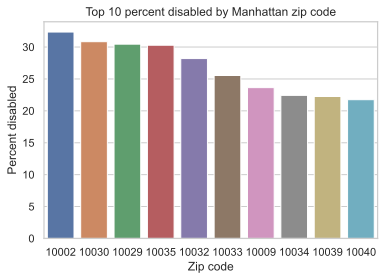

In [198]:
fig, ax = plt.subplots()

sns.barplot(
    x='Zip code', 
    y='percent_disabled',
    data=top_10_percent_disabled,
    order=top_10_percent_disabled.sort_values( # Need to provide x-axis order
        'percent_disabled', ascending=False)['Zip code'],
)

ax.set_ylabel('Percent disabled')
ax.set_title('Top 10 percent disabled by Manhattan zip code')

fig.savefig('percent_disabled_bar_chart.png');

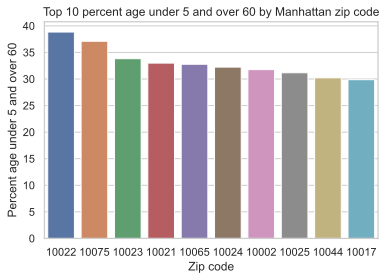

In [197]:
fig, ax = plt.subplots()

sns.barplot(
    x='Zip code', 
    y='percent_age_under_5_over_60',
    data=top_10_percent_age_under_5_over_60,
    order=top_10_percent_age_under_5_over_60.sort_values( 
        'percent_age_under_5_over_60', ascending=False)['Zip code'],
)

ax.set_ylabel('Percent age under 5 and over 60')
ax.set_title('Top 10 percent age under 5 and over 60 by Manhattan zip code')

fig.savefig('percent_age_under_5_over_60_bar_chart.png');

In [191]:
with open('manhattan_populations.pickle', 'rb') as read_file:
    manhattan_populations = pickle.load(read_file)

In [200]:
manhattan_populations.columns = ['Zip code', 'population']

In [202]:
manhattan_populations.head()

,Zip code,population
0,10025,92805
1,10029,79597
2,10002,74993
3,10027,64548
4,10032,64264


In [220]:
manhattan_populations[manhattan_populations['Zip code'] == '10128']
manhattan_populations[manhattan_populations['Zip code'] == '10020']

,Zip code,population
8,10128,59256


,Zip code,population


In [206]:
age_dis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Zip code                                          43 non-null     object 
 1   Population with a cognitive difficulty            41 non-null     float64
 2   Percent with a cognitive difficulty               41 non-null     float64
 3   Population with a vision difficulty               41 non-null     float64
 4   Percent with a vision difficulty                  41 non-null     float64
 5   Population with an independent living difficulty  41 non-null     float64
 6   Percent with an independent living difficulty     41 non-null     float64
 7   Population with a self-care difficulty            41 non-null     float64
 8   Percent with a self-care difficulty               41 non-null     float64
 9   Population with an ambu

In [207]:
manhattan_populations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Zip code    42 non-null     object
 1   population  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes


In [212]:
# This is the right way to join the two dfs
combined = age_dis_df.merge(manhattan_populations, how='left', on='Zip code')

In [222]:
combined.columns.to_list()

['Zip code',
 'Population with a cognitive difficulty',
 'Percent with a cognitive difficulty',
 'Population with a vision difficulty',
 'Percent with a vision difficulty',
 'Population with an independent living difficulty',
 'Percent with an independent living difficulty',
 'Population with a self-care difficulty',
 'Percent with a self-care difficulty',
 'Population with an ambulatory difficulty',
 'Percent with an ambulatory difficulty',
 'Total population',
 'Population under 5 years',
 'Percent population under 5 years',
 'Population 60 years and over',
 'Percent population 60 years and over',
 'percent_under_age_5',
 'percent_over_age_60',
 'percent_age_under_5_over_60',
 'percent_disabled',
 'population']

In [223]:
update_cols_names = [
    'zip_code',
    'Sample population with a cognitive difficulty',
    'Sample percent with a cognitive difficulty',
    'Sample population with a vision difficulty',
    'Sample percent with a vision difficulty',
    'Sample population with an independent living difficulty',
    'Sample percent with an independent living difficulty',
    'Sample population with a self-care difficulty',
    'Sample percent with a self-care difficulty',
    'Sample population with an ambulatory difficulty',
    'Sample percent with an ambulatory difficulty',
    'Sample total sample population',
    'Sample population under 5 years',
    'Sample percent population under 5 years',
    'Sample population 60 years and over',
    'Sample percent population 60 years and over',
    'percent_under_age_5',
    'percent_over_age_60',
    'percent_age_under_5_over_60',
    'percent_disabled',
    'actual_population'
]

In [224]:
combined.columns = update_cols_names

In [227]:
move_cols = [
    'zip_code',
    'actual_population',
    'percent_disabled',
    'percent_under_age_5',
    'percent_over_age_60',
    'percent_age_under_5_over_60',
    'Sample population with a cognitive difficulty',
    'Sample percent with a cognitive difficulty',
    'Sample population with a vision difficulty',
    'Sample percent with a vision difficulty',
    'Sample population with an independent living difficulty',
    'Sample percent with an independent living difficulty',
    'Sample population with a self-care difficulty',
    'Sample percent with a self-care difficulty',
    'Sample population with an ambulatory difficulty',
    'Sample percent with an ambulatory difficulty',
    'Sample total sample population',
    'Sample population under 5 years',
    'Sample percent population under 5 years',
    'Sample population 60 years and over',
    'Sample percent population 60 years and over',
]

In [228]:
combined = combined[move_cols]

In [230]:
combined.head()

,zip_code,actual_population,percent_disabled,percent_under_age_5,percent_over_age_60,percent_age_under_5_over_60,Sample population with a cognitive difficulty,Sample percent with a cognitive difficulty,Sample population with a vision difficulty,Sample percent with a vision difficulty,Sample population with an independent living difficulty,Sample percent with an independent living difficulty,Sample population with a self-care difficulty,Sample percent with a self-care difficulty,Sample population with an ambulatory difficulty,Sample percent with an ambulatory difficulty,Sample total sample population,Sample population under 5 years,Sample percent population under 5 years,Sample population 60 years and over,Sample percent population 60 years and over
0,10001,22924.0,15.16,2.06,21.05,23.11,745.0,3.3,436.0,1.9,570.0,2.7,521.0,2.3,1203.0,5.4,22924.0,472.0,2.1,4825.0,21.0
1,10002,74993.0,32.35,3.52,28.25,31.77,4579.0,6.3,3050.0,4.1,5634.0,8.7,3473.0,4.8,7524.0,10.4,74993.0,2637.0,3.5,21188.0,28.3
2,10003,54682.0,10.28,3.23,16.92,20.15,1426.0,2.7,953.0,1.7,1177.0,2.3,439.0,0.8,1629.0,3.1,54682.0,1767.0,3.2,9253.0,16.9
3,10004,3028.0,5.58,4.13,13.71,17.83,46.0,1.6,59.0,1.9,29.0,1.1,0.0,0.0,35.0,1.2,3028.0,125.0,4.1,415.0,13.7
4,10005,8831.0,1.74,5.91,1.66,7.58,100.0,1.2,6.0,0.1,3.0,0.0,1.0,0.0,44.0,0.5,8831.0,522.0,5.9,147.0,1.7


In [231]:
combined.describe()

,actual_population,percent_disabled,percent_under_age_5,percent_over_age_60,percent_age_under_5_over_60,Sample population with a cognitive difficulty,Sample percent with a cognitive difficulty,Sample population with a vision difficulty,Sample percent with a vision difficulty,Sample population with an independent living difficulty,Sample percent with an independent living difficulty,Sample population with a self-care difficulty,Sample percent with a self-care difficulty,Sample population with an ambulatory difficulty,Sample percent with an ambulatory difficulty,Sample total sample population,Sample population under 5 years,Sample percent population under 5 years,Sample population 60 years and over,Sample percent population 60 years and over
count,42.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00
mean,38318.12,16.12,5.02,19.83,24.85,1440.10,3.46,782.93,1.81,1575.54,4.19,1003.95,2.37,2352.49,5.68,37807.44,1811.83,5.02,8053.98,19.82
std,22119.70,8.06,1.67,6.81,6.43,1289.52,1.80,656.44,0.84,1401.97,2.42,882.14,1.34,1959.72,2.87,22142.40,1085.85,1.67,5576.72,6.81
min,3028.00,0.00,2.06,1.66,7.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3028.00,125.00,2.10,126.00,1.70
25%,22831.00,10.28,3.74,16.74,21.91,534.00,2.30,384.00,1.30,570.00,2.30,339.00,1.40,980.00,4.00,22800.00,899.00,3.70,4430.00,16.70
50%,34736.50,15.27,4.83,19.36,23.83,1143.00,3.10,599.00,1.90,1201.00,3.80,772.00,2.50,1749.00,5.40,33730.00,1767.00,4.80,6958.00,19.40
75%,57114.25,21.46,6.08,24.02,28.80,2057.00,4.30,1068.00,2.30,2299.00,6.00,1491.00,3.20,3195.00,7.70,54682.00,2637.00,6.10,11276.00,24.00
max,92805.00,32.35,9.45,35.32,38.83,5663.00,7.50,3050.00,4.10,5634.00,8.90,3473.00,5.20,7649.00,11.70,92805.00,3911.00,9.40,25020.00,35.30


In [232]:
# Calculate my own population columns for each key metric

combined['actual_population_disabled'] = (combined['actual_population'] 
                                         * combined['percent_disabled'] 
                                          / 100)

combined['actual_population_under_age_5'] = (combined['actual_population']
                                             * combined['percent_under_age_5']
                                             / 100)
                                                                                         
combined['actual_population_over_age_60'] = (combined['actual_population']
                                             * combined['percent_over_age_60']
                                             / 100)

combined['actual_population_under_age_5_over_60'] = (combined['actual_population']
                                                    * combined['percent_age_under_5_over_60']
                                                    / 100)

In [233]:
combined.head()

,zip_code,actual_population,percent_disabled,percent_under_age_5,percent_over_age_60,percent_age_under_5_over_60,Sample population with a cognitive difficulty,Sample percent with a cognitive difficulty,Sample population with a vision difficulty,Sample percent with a vision difficulty,Sample population with an independent living difficulty,Sample percent with an independent living difficulty,Sample population with a self-care difficulty,Sample percent with a self-care difficulty,Sample population with an ambulatory difficulty,Sample percent with an ambulatory difficulty,Sample total sample population,Sample population under 5 years,Sample percent population under 5 years,Sample population 60 years and over,Sample percent population 60 years and over,actual_population_disabled,actual_population_under_age_5,actual_population_over_age_60,actual_population_under_age_5_over_60
0,10001,22924.0,15.16,2.06,21.05,23.11,745.0,3.3,436.0,1.9,570.0,2.7,521.0,2.3,1203.0,5.4,22924.0,472.0,2.1,4825.0,21.0,3475.0,472.0,4825.0,5297.0
1,10002,74993.0,32.35,3.52,28.25,31.77,4579.0,6.3,3050.0,4.1,5634.0,8.7,3473.0,4.8,7524.0,10.4,74993.0,2637.0,3.5,21188.0,28.3,24260.0,2637.0,21188.0,23825.0
2,10003,54682.0,10.28,3.23,16.92,20.15,1426.0,2.7,953.0,1.7,1177.0,2.3,439.0,0.8,1629.0,3.1,54682.0,1767.0,3.2,9253.0,16.9,5624.0,1767.0,9253.0,11020.0
3,10004,3028.0,5.58,4.13,13.71,17.83,46.0,1.6,59.0,1.9,29.0,1.1,0.0,0.0,35.0,1.2,3028.0,125.0,4.1,415.0,13.7,169.0,125.0,415.0,540.0
4,10005,8831.0,1.74,5.91,1.66,7.58,100.0,1.2,6.0,0.1,3.0,0.0,1.0,0.0,44.0,0.5,8831.0,522.0,5.9,147.0,1.7,154.0,522.0,147.0,669.0


In [236]:
combined[combined.isna().any(axis=1)]

,zip_code,actual_population,percent_disabled,percent_under_age_5,percent_over_age_60,percent_age_under_5_over_60,Sample population with a cognitive difficulty,Sample percent with a cognitive difficulty,Sample population with a vision difficulty,Sample percent with a vision difficulty,Sample population with an independent living difficulty,Sample percent with an independent living difficulty,Sample population with a self-care difficulty,Sample percent with a self-care difficulty,Sample population with an ambulatory difficulty,Sample percent with an ambulatory difficulty,Sample total sample population,Sample population under 5 years,Sample percent population under 5 years,Sample population 60 years and over,Sample percent population 60 years and over,actual_population_disabled,actual_population_under_age_5,actual_population_over_age_60,actual_population_under_age_5_over_60
17,10020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,10128,59256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
with open('cleaned_data_combined_df.pickle', 'wb') as to_write:
    pickle.dump(combined, to_write)

In [244]:
# Create smaller dfs of relevant population metrics
top_10_population_disabled = (combined[['zip_code', 'actual_population_disabled']].
                           sort_values('actual_population_disabled', ascending=False)[:10])

top_10_population_age_under_5_over_60 = (combined[['zip_code', 'actual_population_under_age_5_over_60']].
                                     sort_values(
                                         'actual_population_under_age_5_over_60', 
                                         ascending=False)[:10]
                                     )

In [245]:
top_10_population_disabled
top_10_population_age_under_5_over_60

,zip_code,actual_population_disabled
1,10002,24260.0
26,10029,24241.0
29,10032,18119.0
22,10025,17545.0
30,10033,15222.0
7,10009,13695.0
28,10031,12668.0
24,10027,11386.0
32,10035,10825.0
20,10023,9738.0


,zip_code,actual_population_under_age_5_over_60
22,10025,28931.0
1,10002,23825.0
20,10023,21116.0
21,10024,19019.0
26,10029,18966.0
18,10021,15250.0
30,10033,14882.0
29,10032,14424.0
7,10009,13667.0
25,10028,13422.0


In [246]:
top_10_population_disabled.reset_index(drop=True, inplace=True)
top_10_population_age_under_5_over_60.reset_index(drop=True, inplace=True)

In [247]:
top_10_population_disabled
top_10_population_age_under_5_over_60

,zip_code,actual_population_disabled
0,10002,24260.0
1,10029,24241.0
2,10032,18119.0
3,10025,17545.0
4,10033,15222.0
5,10009,13695.0
6,10031,12668.0
7,10027,11386.0
8,10035,10825.0
9,10023,9738.0


,zip_code,actual_population_under_age_5_over_60
0,10025,28931.0
1,10002,23825.0
2,10023,21116.0
3,10024,19019.0
4,10029,18966.0
5,10021,15250.0
6,10033,14882.0
7,10032,14424.0
8,10009,13667.0
9,10028,13422.0


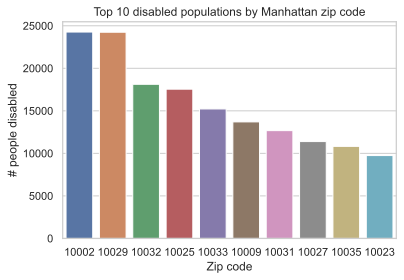

In [251]:
fig, ax = plt.subplots()

sns.barplot(
    x='zip_code', 
    y='actual_population_disabled',
    data=top_10_population_disabled,
    order=top_10_population_disabled.sort_values( 
        'actual_population_disabled', ascending=False)['zip_code'],
)

ax.set_xlabel('Zip code')
ax.set_ylabel('# people disabled')
ax.set_title('Top 10 disabled populations by Manhattan zip code')

fig.savefig('population_disabled_bar_chart.png');

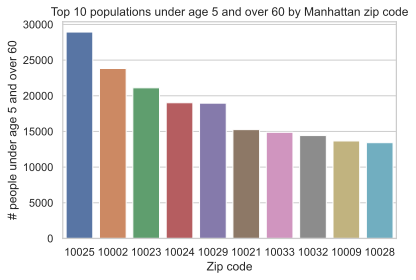

In [252]:
fig, ax = plt.subplots()

sns.barplot(
    x='zip_code', 
    y='actual_population_under_age_5_over_60',
    data=top_10_population_age_under_5_over_60,
    order=top_10_population_age_under_5_over_60.sort_values( 
        'actual_population_under_age_5_over_60', ascending=False)['zip_code'],
)

ax.set_xlabel('Zip code')
ax.set_ylabel('# people under age 5 and over 60')
ax.set_title('Top 10 populations under age 5 and over 60 by Manhattan zip code')

fig.savefig('population_age_under_5_over_60_bar_chart.png');

# Scraps (ignore code below) #

In [78]:
age_columns = [x for x in demographics_df.columns if ('population' in x) and ('Margin of Error' not in x)]

In [83]:
age_columns.append('Zip Code')

In [91]:
age_df = demographics_df[age_columns]

In [92]:
age_df

,Estimate!!Total population,Estimate!! Total population Under 5 years,Estimate!! Percent!! Total population Under 5 years,Estimate!!Total population 60 years and over,Estimate!!Percent!!Total population 60 years and over,Zip Code
0,22924,472,2.1,4825,21,10001
1,74993,2637,3.5,21188,28.3,10002
2,54682,1767,3.2,9253,16.9,10003
3,3028,125,4.1,415,13.7,10004
4,8831,522,5.9,147,1.7,10005
5,3454,251,7.3,126,3.6,10006
6,7023,539,7.7,692,9.9,10007
7,57925,1463,2.5,12204,21.1,10009
8,33730,1699,5,5824,17.3,10010
9,50472,1546,3.1,11714,23.2,10011


In [86]:
cols = age_df.columns.tolist()

In [93]:
cols_with_zip_code = [
    'Zip Code',
    'Estimate!!Total population',
    'Estimate!! Total population Under 5 years',
    'Estimate!! Percent!! Total population Under 5 years',
    'Estimate!!Total population 60 years and over',
    'Estimate!!Percent!!Total population 60 years and over',
]

In [105]:
cols_wo_zip_code = [
    'Estimate!!Total population',
    'Estimate!! Total population Under 5 years',
    'Estimate!! Percent!! Total population Under 5 years',
    'Estimate!!Total population 60 years and over',
    'Estimate!!Percent!!Total population 60 years and over',
]

In [94]:
age_df = age_df[cols]

In [99]:
age_df.describ

(43, 6)

In [118]:
age_df # Replace with those two rows with 0s

,Zip Code,Estimate!!Total population,Estimate!! Total population Under 5 years,Estimate!! Percent!! Total population Under 5 years,Estimate!!Total population 60 years and over,Estimate!!Percent!!Total population 60 years and over
0,10001,22924,472,2.1,4825,21
1,10002,74993,2637,3.5,21188,28.3
2,10003,54682,1767,3.2,9253,16.9
3,10004,3028,125,4.1,415,13.7
4,10005,8831,522,5.9,147,1.7
5,10006,3454,251,7.3,126,3.6
6,10007,7023,539,7.7,692,9.9
7,10009,57925,1463,2.5,12204,21.1
8,10010,33730,1699,5,5824,17.3
9,10011,50472,1546,3.1,11714,23.2


In [124]:
age_df.loc[[17, 41], cols_wo_zip_code] = [np.nan, np.nan, np.nan, np.nan, np.nan]

In [130]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Zip Code                                               43 non-null     object 
 1   Estimate!!Total population                             41 non-null     float64
 2   Estimate!! Total population Under 5 years              41 non-null     float64
 3   Estimate!! Percent!! Total population Under 5 years    41 non-null     object 
 4   Estimate!!Total population 60 years and over           41 non-null     float64
 5   Estimate!!Percent!!Total population 60 years and over  41 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.1+ KB


In [ ]:
age_df.info()

In [ ]:
df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)

In [ ]:
(age_df[['Estimate!! Percent!! Total population Under 5 years', 'Estimate!!Percent!!Total population 60 years and over']] 
= (age_df[['Estimate!! Percent!! Total population Under 5 years', 
        'Estimate!!Percent!!Total population 60 years and over']]).apply(pd.to_numeric))

In [ ]:
age_df.info()

In [ ]:
age_df.head()

In [68]:
# Change dtype of percentages to float64
demographics_df = demographics_df.astype({'Estimate!! Percent!! Total population Under 5 years': 'float64', 
                                         'Estimate!!Percent!!Total population 60 years and over': 'float64'})

ValueError: could not convert string to float: '-'

In [66]:
demographics_df['percent_need_elevator_age'] = (demographics_df['Estimate!! Percent!! Total population Under 5 years'] 
                                                + demographics_df['Estimate!!Percent!!Total population 60 years and over'])

In [67]:
demographics_df

,id,Zip Code,Estimate!! With a cognitive difficulty,Margin of Error ! With a cognitive difficulty,Estimate!! Percent with a cognitive difficulty,Margin of Error!!Percent with a cognitive difficulty,Estimate!! With a vision difficulty,Margin of Error!!With a vision difficulty,Estimate!!Percent with a vision difficulty,Margin of Error!!Percent with a vision difficulty,Estimate!! With an independent living difficulty,Margin of Error!! With an independent living difficulty,Estimate!!Percent with an independent living difficulty,Margin of Error!!Percent with an independent living difficulty,Estimate!! With a self-care difficulty,Margin of Error!! With a self-care difficulty,Estimate!! With a self-care difficulty.1,Margin of Error!!Percent with a self-care difficulty,Estimate!! With an ambulatory difficulty,Margin of Error!! With an ambulatory difficulty,Estimate!!Percent with an ambulatory difficulty,Margin of Error!!Percent with an ambulatory difficulty,Estimate!!Total population,Margin of Error!!Total population,Estimate!! Total population Under 5 years,Margin of Error!! Total population Under 5 years,Estimate!! Percent!! Total population Under 5 years,Margin of Error!!Percent !!Total population Under 5 years,Estimate!!Total population 60 years and over,Margin of Error!! Total population 60 years and over,Estimate!!Percent!!Total population 60 years and over,Margin of Error!!Percent!!Total population 60 years and over,percent_need_elevator_age
0,8600000US10001,10001,745,235,3.3,1,436,157,1.9,0.7,570,184,2.7,0.9,521,179,2.3,0.8,1203,263,5.4,1.2,22924,1190,472,163,2.1,0.7,4825,503,21,2.2,2.121
1,8600000US10002,10002,4579,713,6.3,0.9,3050,418,4.1,0.6,5634,724,8.7,1.1,3473,491,4.8,0.7,7524,760,10.4,1,74993,1909,2637,475,3.5,0.6,21188,1102,28.3,1.5,3.528.3
2,8600000US10003,10003,1426,390,2.7,0.7,953,269,1.7,0.5,1177,401,2.3,0.8,439,184,0.8,0.4,1629,344,3.1,0.7,54682,1754,1767,367,3.2,0.6,9253,826,16.9,1.4,3.216.9
3,8600000US10004,10004,46,40,1.6,1.4,59,46,1.9,1.5,29,46,1.1,1.7,0,12,0,1.1,35,39,1.2,1.3,3028,442,125,61,4.1,2.1,415,189,13.7,6.2,4.113.7
4,8600000US10005,10005,100,78,1.2,0.9,6,10,0.1,0.1,3,5,0,0.1,1,4,0,0.1,44,36,0.5,0.4,8831,762,522,237,5.9,2.6,147,107,1.7,1.2,5.91.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,8600000US10271,10271,0,12,-,**,0,12,-,**,0,12,-,**,0,12,-,**,0,12,-,**,0,12,0,12,-,**,0,12,-,**,--
64,8600000US10278,10278,0,12,-,**,0,12,-,**,0,12,-,**,0,12,-,**,0,12,-,**,0,12,0,12,-,**,0,12,-,**,--
65,8600000US10279,10279,0,12,0,45.2,0,12,0,45.2,0,12,0,45.2,0,12,0,45.2,0,12,0,45.2,43,70,0,12,0,45.2,0,12,0,45.2,00
66,8600000US10280,10280,90,79,1,0.9,53,63,0.6,0.7,69,72,0.9,1,69,72,0.8,0.8,151,99,1.7,1.1,9384,795,711,314,7.6,3.1,1233,255,13.1,2.9,7.613.1
